<a href="https://colab.research.google.com/github/OJO44/24bMachineLearning1/blob/main/TelecommmunicationChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#The goal of this process is to be able to leverage on the classification and regression algorithm to create models that can give upto 95 % score / probability of churn

In [ ]:
# Removes Warnings
import warnings
warnings.filterwarnings('ignore')
#import the necessary packages for Statistical analysis
import pandas as pd
import numpy as np
#Import the necessary packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the dataset
data= "/content/Telco_Churn_Data.csv"
data= pd.read_csv(data)
data.head(5)

,Target Churn,Target Code,Current Bill Amt,Avg Calls,Avg Calls Weekdays,Account Age,Percent Increase MOM,Acct Plan Subtype,Complaint Code,Avg Days Delinquent,Current TechSupComplaints,Current Days OpenWorkOrders,Equipment Age,Condition of Current Handset,Avg Hours WorkOrderOpenned
0,No Churn,0,14210,17950.000000,30297.0000,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0
1,Churn,1,14407,0.000000,0.0000,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0
2,Churn,1,12712,204.666667,10393.6667,23,0.000000,Gold,Billing Problem,17.6,0,0.0,23,1.0,0.0
3,No Churn,0,13807,15490.333300,41256.3333,39,0.148986,Silver,Billing Problem,0.0,0,0.0,17,1.0,0.0
4,No Churn,0,3805,5075.000000,12333.3333,23,-0.686047,Gold,Billing Problem,3.8,0,0.0,10,1.0,0.0


In [ ]:

data.shape

(4708, 15)

In [ ]:
#Identify Missing Values
data.isnull().values.any()

True

In [ ]:
#Identify missing values
data.isnull().sum()

Target Churn                      0
Target Code                       0
Current Bill Amt                  0
Avg Calls                         0
Avg Calls Weekdays                0
Account Age                       0
Percent Increase MOM              0
Acct Plan Subtype                 0
Complaint Code                    7
Avg Days Delinquent               0
Current TechSupComplaints         0
Current Days OpenWorkOrders       0
Equipment Age                     0
Condition of Current Handset    444
Avg Hours WorkOrderOpenned        0
dtype: int64

Only two columns have missingness

In [ ]:
#Identify uniqueness in the categorical columns
data["Complaint Code"].unique()

array(['Billing Problem', 'Moving', 'Check Account', 'Call Quality',
       'Inaccurate Sales Inf', nan, 'Pricing'], dtype=object)

There are six unique complain codes, with others having nans

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target Churn                  4708 non-null   object 
 1   Target Code                   4708 non-null   int64  
 2   Current Bill Amt              4708 non-null   int64  
 3   Avg Calls                     4708 non-null   float64
 4   Avg Calls Weekdays            4708 non-null   float64
 5   Account Age                   4708 non-null   int64  
 6   Percent Increase MOM          4708 non-null   float64
 7   Acct Plan Subtype             4708 non-null   object 
 8   Complaint Code                4701 non-null   object 
 9   Avg Days Delinquent           4708 non-null   float64
 10  Current TechSupComplaints     4708 non-null   int64  
 11  Current Days OpenWorkOrders   4708 non-null   float64
 12  Equipment Age                 4708 non-null   int64  
 13  Con

In [ ]:
data["Equipment Age"].describe()

In [ ]:
data.columns=data.columns.str.replace(' ','_')

In [ ]:
data.columns=data.columns.str.replace(' ','_')

In [ ]:
# Fix typo in Avg_Hours_WorkOrderOpenned column
data['Avg_Hours_WorkOrderOpened'] = \
data['Avg_Hours_WorkOrderOpenned']
# Let's drop the older column (with typo)
data.drop(["Avg_Hours_WorkOrderOpenned"],axis=1,inplace=True)

In [ ]:
data.columns

Index(['Target_Churn', 'Target_Code', 'Current_Bill_Amt', 'Avg_Calls',
       'Avg_Calls_Weekdays', 'Account_Age', 'Percent_Increase_MOM',
       'Acct_Plan_Subtype', 'Complaint_Code', 'Avg_Days_Delinquent',
       'Current_TechSupComplaints', 'Current_Days_OpenWorkOrders',
       'Equipment_Age', 'Condition_of_Current_Handset',
       'Avg_Hours_WorkOrderOpenned'],
      dtype='object')

In [ ]:
data.describe()

,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_TechSupComplaints,Current_Days_OpenWorkOrders,Equipment_Age,Condition_of_Current_Handset,Avg_Hours_WorkOrderOpenned
count,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4264.000000,4708.000000
mean,0.485769,19828.815845,9269.690314,38127.994973,26.079652,-0.005127,13.968564,0.414826,2.438828,10.811810,1.019231,0.936501
std,0.499851,17204.510108,10437.339850,39172.244943,7.149933,4.481852,10.789062,0.954549,20.197292,8.710548,0.144021,8.926752
min,0.000000,-690.000000,0.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,12288.000000,2602.250002,13031.250025,20.000000,-0.574084,6.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,0.000000,15254.000000,6396.333330,26765.833350,25.000000,-0.185280,12.400000,0.000000,0.000000,9.000000,1.000000,0.000000
75%,1.000000,22799.000000,12250.499975,50061.416675,32.000000,0.121823,19.300000,0.000000,0.000000,17.000000,1.000000,0.000000
max,1.000000,325127.000000,181786.000000,374457.667000,40.000000,210.100000,126.000000,11.000000,368.000000,39.000000,3.000000,297.500000


In [ ]:
data.describe(include='object')

,Target_Churn,Acct_Plan_Subtype,Complaint_Code
count,4708,4708,4701
unique,2,2,6
top,No Churn,Silver,Billing Problem
freq,2421,3914,2908


In [ ]:
#Change the data type of the Target_Code,
#Condition_of_Current_Handset, and Current_TechSupComplaints
#columns from continuous to the categorical object type

data['Target_Code']=data.Target_Code.astype('object')
data['Condition_of_Current_Handset']=\
data.Condition_of_Current_Handset.astype('object')
data['Current_TechSupComplaints']=\
data.Current_TechSupComplaints.astype('object')
data['Target_Code']=data.Target_Code.astype('int64')
data.describe(include='object')

,Target_Churn,Acct_Plan_Subtype,Complaint_Code,Current_TechSupComplaints,Condition_of_Current_Handset
count,4708,4708,4701,4708,4264.0
unique,2,2,6,11,3.0
top,No Churn,Silver,Billing Problem,0,1.0
freq,2421,3914,2908,3589,4186.0


In [ ]:
round(data.isnull().sum()/len(data)*100,2)

Target_Churn                    0.00
Target_Code                     0.00
Current_Bill_Amt                0.00
Avg_Calls                       0.00
Avg_Calls_Weekdays              0.00
Account_Age                     0.00
Percent_Increase_MOM            0.00
Acct_Plan_Subtype               0.00
Complaint_Code                  0.15
Avg_Days_Delinquent             0.00
Current_TechSupComplaints       0.00
Current_Days_OpenWorkOrders     0.00
Equipment_Age                   0.00
Condition_of_Current_Handset    9.43
Avg_Hours_WorkOrderOpenned      0.00
dtype: float64

In [ ]:
#Explore the complain code column
data.Complaint_Code.value_counts()

Complaint_Code
Billing Problem         2908
Call Quality            1070
Moving                   511
Check Account            195
Inaccurate Sales Inf      13
Pricing                    4
Name: count, dtype: int64

In [ ]:
#Explore the condition of current handset column
data.Condition_of_Current_Handset.value_counts()

Condition_of_Current_Handset
1.0    4186
2.0      74
3.0       4
Name: count, dtype: int64

In [ ]:
#Handling missingness

data['Complaint_Code']=data['Complaint_Code']\
                       .fillna(value='Billing Problem')
data['Condition_of_Current_Handset']=\
data['Condition_of_Current_Handset'].fillna(value=1)
data['Condition_of_Current_Handset']=\
data.Condition_of_Current_Handset.astype('object')


In [ ]:
#8. Perform data exploration by initially exploring the Target_Churn variable
data['Target_Churn'].value_counts(0)

Target_Churn
No Churn    2421
Churn       2287
Name: count, dtype: int64

In [ ]:
data['Target_Churn'].value_counts(1)*100

Target_Churn
No Churn    51.42311
Churn       48.57689
Name: proportion, dtype: float64

In [ ]:
summary_churn = data.groupby('Target_Churn')
summary_churn.mean()

In [ ]:
#.correlation among different variables and explain the results
corr = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, \
            xticklabels=corr.columns.values, \
 yticklabels=corr.columns.values,annot=True,\
 cmap='Greys_r')
corr


Text(0, 0.5, 'No of Customers')

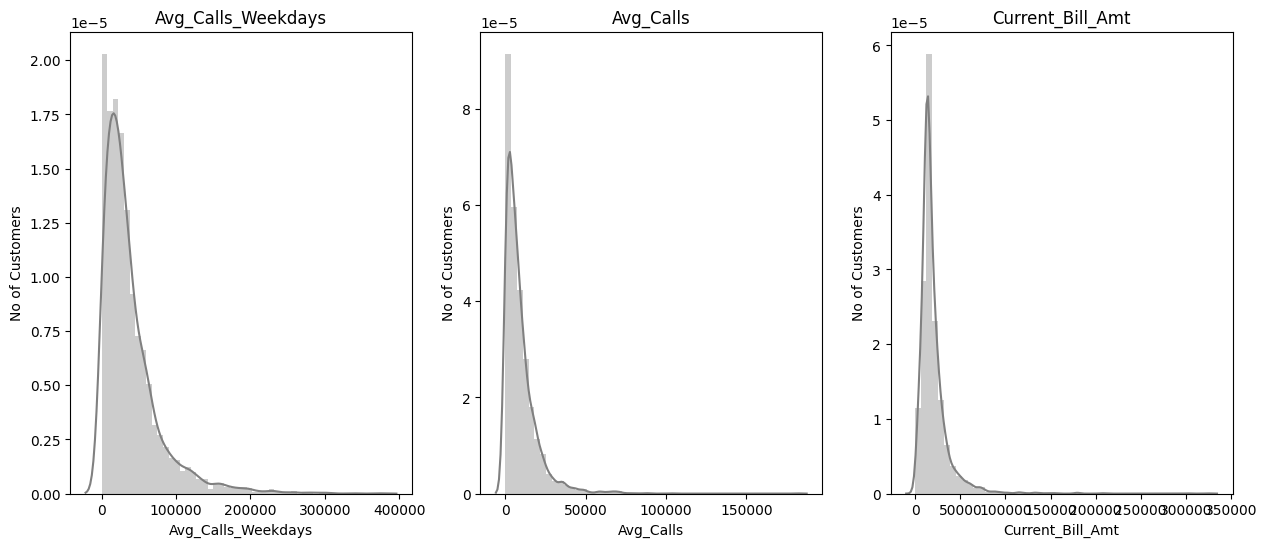

In [ ]:
# univariate and bivariate analyses.
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.distplot(data.Avg_Calls_Weekdays, kde=True, \
 color="gray", \
             ax=axes[0]).set_title('Avg_Calls_Weekdays')
axes[0].set_ylabel('No of Customers')
sns.distplot(data.Avg_Calls, kde=True, color="gray", \
             ax=axes[1]).set_title('Avg_Calls')
axes[1].set_ylabel('No of Customers')
sns.distplot(data.Current_Bill_Amt, kde=True, color="gray", \
             ax=axes[2]).set_title('Current_Bill_Amt')
axes[2].set_ylabel('No of Customers')

Text(0.5, 1.0, 'Customer Complaint Code Distribution')

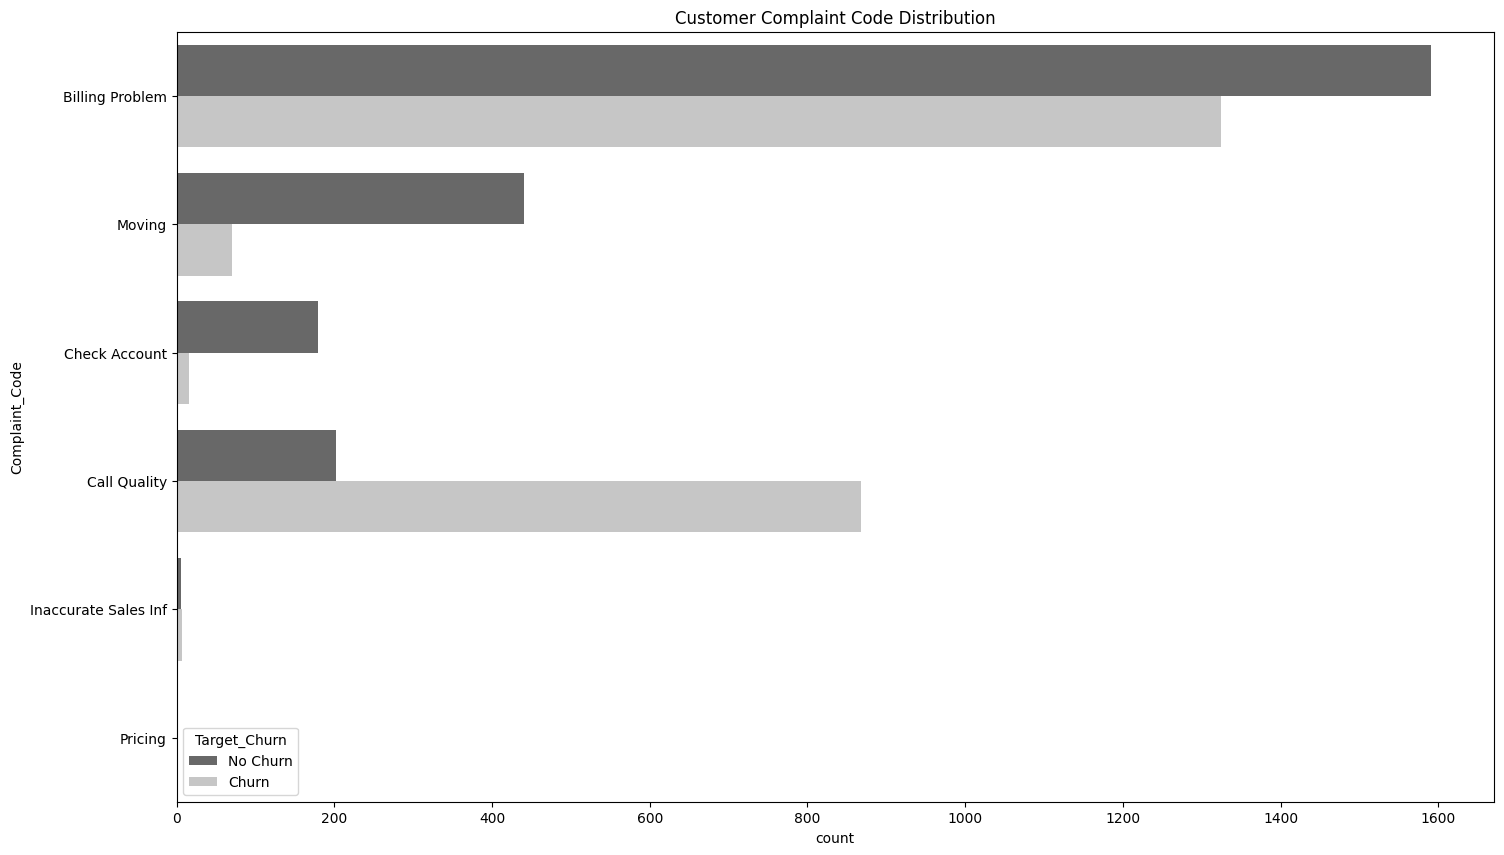

In [ ]:
#Bivariate Analysis
plt.figure(figsize=(17,10))
p=sns.countplot(y="Complaint_Code", hue='Target_Churn', \
 data=data, palette="Greys_r")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Complaint Code Distribution')

Text(0.5, 1.0, 'Customer Acct_Plan_Subtype Distribution')

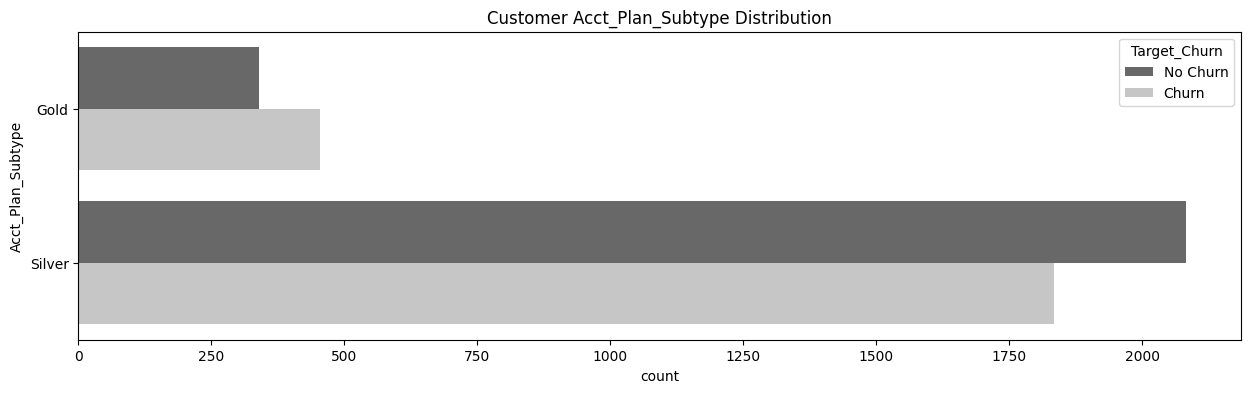

In [ ]:
plt.figure(figsize=(15,4))
p=sns.countplot(y="Acct_Plan_Subtype", hue='Target_Churn', \
 data=data,palette="Greys_r")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Acct_Plan_Subtype Distribution')

Text(0.5, 1.0, 'Customer Current_TechSupComplaints Distribution')

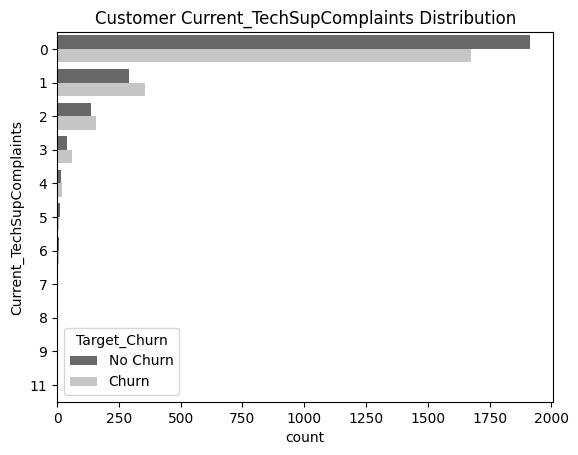

In [ ]:
p=sns.countplot(y="Current_TechSupComplaints", hue='Target_Churn', \
 data=data,palette="Greys_r")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Current_TechSupComplaints Distribution')

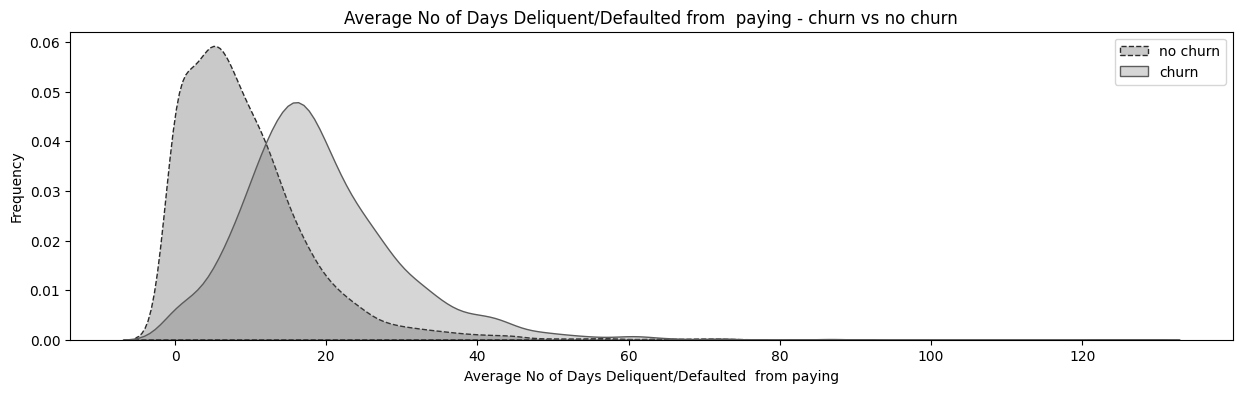

In [ ]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0), \
 'Avg_Days_Delinquent'] , \
 color=sns.color_palette("Greys_r")[0],\
 shade=True,label='no churn',\
 linestyle='--')
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1),\
 'Avg_Days_Delinquent'] , \
 color=sns.color_palette("Greys_r")[1],\
 shade=True, label='churn')
ax.set(xlabel='Average No of Days Deliquent/Defaulted \
 from paying', ylabel='Frequency')
plt.title('Average No of Days Deliquent/Defaulted from \
 paying - churn vs no churn')
plt.legend()

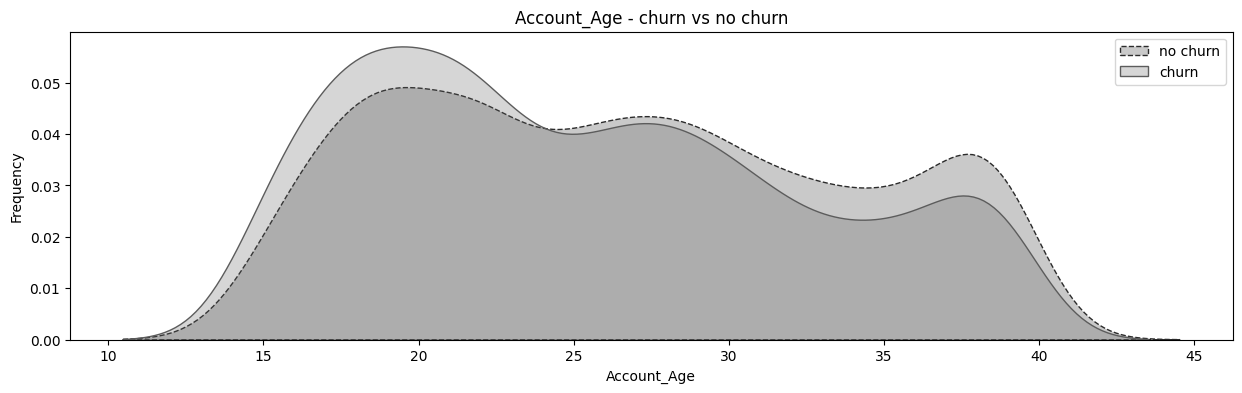

In [ ]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0), \
 'Account_Age'], \
 color=sns.color_palette("Greys_r")[0], \
 shade=True,label='no churn',\
 linestyle='--')
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1), \
 'Account_Age'], \
 color=sns.color_palette("Greys_r")[1] ,\
 shade=True, label='churn')
ax.set(xlabel='Account_Age', ylabel='Frequency')
plt.title('Account_Age - churn vs no churn')
plt.legend()


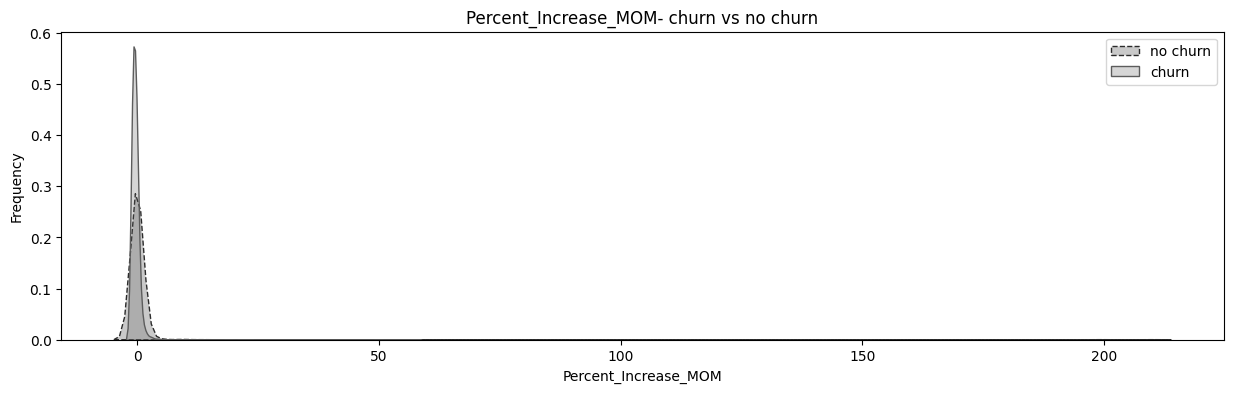

In [ ]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0), \
 'Percent_Increase_MOM'], \
 color=sns.color_palette("Greys_r")[0], \
 shade=True, label='no churn',\
 linestyle='--')
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1), \
 'Percent_Increase_MOM'], \
 color=sns.color_palette("Greys_r")[1], \
 shade=True, label='churn')
ax.set(xlabel='Percent_Increase_MOM', ylabel='Frequency')
plt.title('Percent_Increase_MOM- churn vs no churn')
plt.legend()


In [ ]:
#Data modelling
#Feature selection using treebased feature selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:

#Encode categorical variables using label encoding
data["Acct_Plan_Subtype"] = data["Acct_Plan_Subtype"]\
 .astype('category').cat.codes  #the cat.codes assigns numerical variables
data["Complaint_Code"] = data["Complaint_Code"]\
 .astype('category').cat.codes
data[["Acct_Plan_Subtype", "Complaint_Code"]].head()

,Acct_Plan_Subtype,Complaint_Code
0,0,0
1,1,4
2,0,0
3,1,0
4,0,0


In [ ]:
#Split the data into training and testing sets
target = 'Target_Code'
X = data.drop(['Target_Code','Target_Churn'], axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split\
                                   (X, y, test_size=0.15, \
 random_state=123, stratify=y)

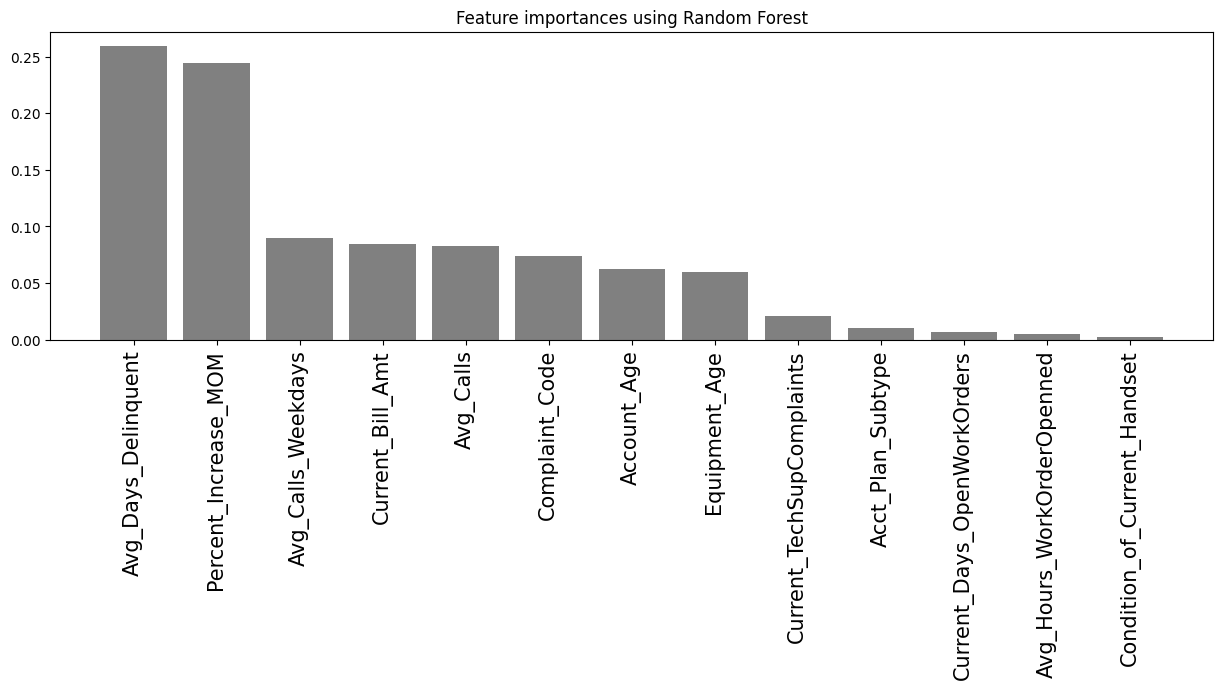

In [ ]:
# Fit the model using the random forest classifier for feature selection
# forest=RandomForestClassifier(n_estimators=500,random_state=1)
# forest.fit(X_train,y_train)
# importances=forest.feature_importances_
# features = data.drop(['Target_Code','Target_Churn'],axis=1)\
#  .columns
# indices = np.argsort(importances)[::-1]
# plt.figure(figsize=(15,4))
# plt.title("Feature importances using Random Forest")
# plt.bar(range(X_train.shape[1]), importances[indices],\
#  color='gray', align='center')
# plt.xticks(range(X_train.shape[1]), features[indices], \
#            rotation='vertical', fontsize=15)
# plt.xlim([-1, X_train.shape[1]])
#plt.show()

# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Fit the random forest model
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

# Get the feature importances
importances = forest.feature_importances_

# Get the feature names
features = data.drop(['Target_Code', 'Target_Churn'], axis=1).columns

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Create a bar plot to visualize the feature importances
plt.figure(figsize=(15, 4))
plt.title("Feature Importances Using Random Forest")
plt.bar(range(len(importances)), importances[sorted_indices], color='gray', align='center')
plt.xticks(range(len(importances)), features[sorted_indices], rotation='vertical', fontsize=10)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [ ]:
logistic_regression.summary
logistic_regression.params

Avg_Days_Delinquent     1.109226e-01
Percent_Increase_MOM   -3.922044e-01
Avg_Calls_Weekdays     -3.315366e-06
Current_Bill_Amt       -2.385475e-07
Avg_Calls              -1.817086e-06
Complaint_Code         -2.083688e-01
Account_Age            -4.794911e-02
dtype: float64

In [ ]:
#Try Logistic Regression
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(random_state=0,solver='lbfgs')\
               .fit(X_train[top7_features], y_train)
clf_logistic


LogisticRegression(random_state=0)

In [ ]:
clf_logistic.score(X_test[top7_features], y_test)

0.7454031117397454

This shows that the logistic regression model is getting an accuracy of 74.5%,

In [ ]:
#Try Support Vector Mechanism
from sklearn import svm

In [ ]:
# Scale the training and testing data using MInMax Scaler
# Import the necessary library
from sklearn.preprocessing import MinMaxScaler

# Scale the training data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X_train[top7_features])
X_train_svm = scaler.transform(X_train[top7_features])

# Scale the testing data using the same scaler
X_test_svm = scaler.transform(X_test[top7_features])


In [ ]:
#Fit the SVM  model
clf_svm=svm.SVC(kernel='linear', C=1)
clf_svm.fit(X_train_svm,y_train)

SVC(C=1, kernel='linear')

In [ ]:
clf_svm.score(X_test_svm, y_test)

0.7637906647807637

This shows that the SVM classifier is performing better than the logistic
regression model.

In [ ]:
#Try decision tree classifier
from sklearn import Tree

In [ ]:
#Try decision tree classifier
from sklearn import tree
clf_decision = tree.DecisionTreeClassifier()
clf_decision.fit(X_train[top7_features],y_train)

clf_decision.score(X_test[top7_features], y_test)

In [ ]:
# Import the RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=20,  # Number of decision trees in the forest
    max_depth=None,   # No limit on the depth of the trees
    min_samples_split=7,  # Minimum number of samples required to split a node
    random_state=0        # Seed for the random number generator
)

# Train the Random Forest Classifier
rf_model.fit(X_train[top7_features], y_train)
#Score the model
clf_random.score(X_test[top7_features], y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_random = RandomForestClassifier(n_estimators=20, \
                                    max_depth=None, \
 min_samples_split=7, \
random_state=0)
clf_random.fit(X_train[top7_features], y_train)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [ ]:
clf_random.score(X_test[top7_features], y_test)

0.8104667609618105